In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [4]:
df = pd.read_csv('구급출동_전주_2020_2022.csv', encoding='cp949')
df

,구급보고서번호,등록완료구분명,환자발생유형구분명,교통사고명,교통사고기타명,소방서명,서센터명,소방지역대명,구급활동구분명,헬리콥터펌뷸런스유무명,...,현장거리2,재이송사유2,이송분류명,이송분류사유,시간단위기온,시간단위강수량,시간단위풍속,시간단위풍향,시간단위습도,시간단위적설량
0,20224511302M00001,등록완료,질병외,운전자,NaN,완주소방서,삼례119안전센터,NaN,특수일반,NaN,...,NaN,NaN,이송,NaN,-4.90,NaN,0.90,70.00,51.00,NaN
1,20224501101M00006,등록완료,질병외,오토바이사고,NaN,전주덕진소방서,금암119안전센터,NaN,특수일반,NaN,...,NaN,NaN,이송,NaN,1.70,NaN,1.30,360.00,31.00,NaN
2,20224501102M00004,등록완료,질병외,오토바이사고,NaN,전주덕진소방서,팔복119안전센터,NaN,특수일반,NaN,...,NaN,NaN,이송,NaN,2.20,NaN,1.30,320.00,31.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,20204502102M04996,등록완료,질병외,오토바이사고,NaN,전주완산소방서,효자119안전센터,NaN,특수일반,NaN,...,NaN,NaN,이송,NaN,-5.30,NaN,1.80,340.00,56.00,1.60
6738,20204501105M02811,등록완료,질병외,보행자,NaN,전주덕진소방서,전미119안전센터,NaN,특수일반,NaN,...,NaN,NaN,이송,NaN,-3.70,NaN,0.20,0.00,52.00,1.40
6739,20204502104M02966,등록완료,질병외,보행자,NaN,전주완산소방서,노송119안전센터,NaN,특수일반,NaN,...,NaN,NaN,이송,NaN,-2.30,NaN,1.30,320.00,92.00,3.30


In [5]:
df['교통사고분류'] = '나머지'
df.loc[df['교통사고명'] == '보행자','교통사고분류'] = '보행자'
df.loc[df['교통사고명'] == '자전거사고','교통사고분류'] = '자전거'
df.loc[df['교통사고명'] == '오토바이사고','교통사고분류'] = '오토바이'

In [13]:
df = df[df['환자연령'] != 999]

c:\Users\yykyy\anaconda3\lib\site-packages\seaborn\_core\plot.py:941: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\yykyy\anaconda3\lib\site-packages\seaborn\_core\plot.py:941: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\yykyy\anaconda3\lib\site-packages\seaborn\_core\plot.py:941: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\yykyy\anaconda3\lib\site-packages\seaborn\_core\plot.py:941: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  self._figure.savefig(buffer, dpi=dpi * 2, format="png", bbox_inches="tight")
c:\Users\yykyy\anaconda3\lib\site-packages\seaborn\_core\plot.py:941: UserWarning: Glyph

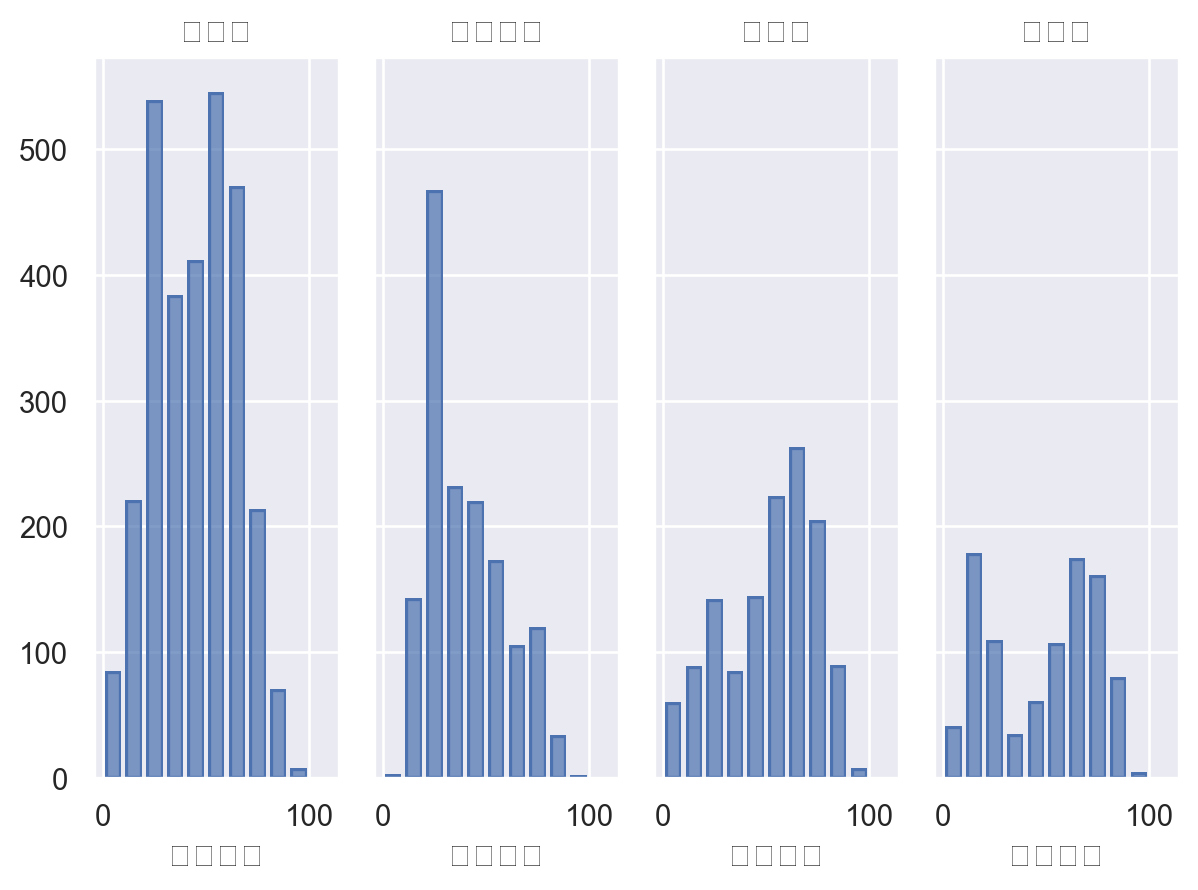

In [15]:
(
    so.Plot(df, x='환자연령')
    .add(so.Bar(), so.Hist(binwidth=10))
    .facet('교통사고분류')
)

In [16]:
len(df[(df['교통사고분류']=='자전거')&(df['환자연령']<20)])

220

In [19]:
len(df[(df['교통사고분류']=='자전거')&(df['환자연령']>=65)])

332

In [18]:
len(df[(df['교통사고분류']=='자전거')&(df['환자연령']>=70)])

246

<Axes: >

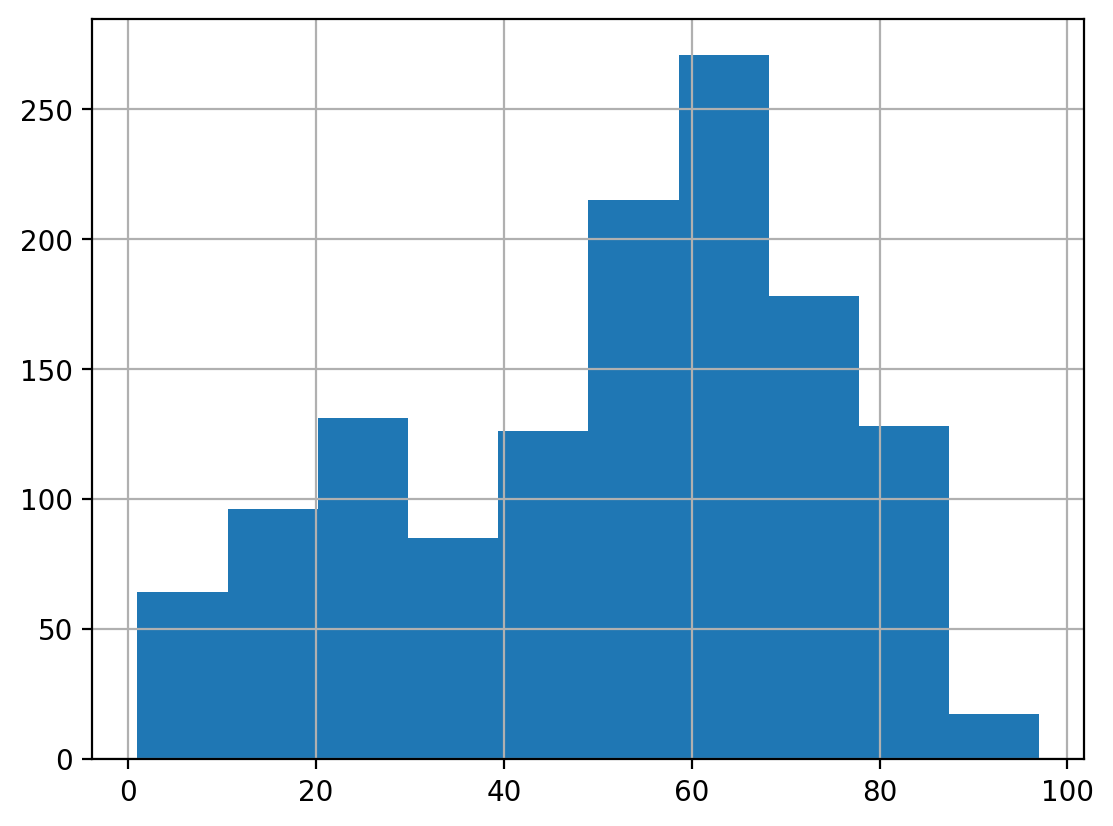

In [22]:
df[(df['교통사고분류']=='보행자')]['환자연령'].hist(bin)

In [20]:
len(df[(df['교통사고분류']=='보행자')&(df['환자연령']>=70)])

303